## Adhoc Statistical Visualization - Colleges/Universities

### Data visualization using statistical methods and charts such as boxplots and scatterplots

### **1. Importing libraries and loading data**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
college = pd.read_csv('College.csv', index_col= 0)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### **2. Data cleaning**

In [5]:
college.index

Index(['Abilene Christian University', 'Adelphi University', 'Adrian College',
       'Agnes Scott College', 'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College',
       ...
       'Winthrop University', 'Wisconsin Lutheran College',
       'Wittenberg University', 'Wofford College',
       'Worcester Polytechnic Institute', 'Worcester State College',
       'Xavier University', 'Xavier University of Louisiana',
       'Yale University', 'York College of Pennsylvania'],
      dtype='object', length=777)

In [6]:
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [7]:
list(college.isna().sum())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [8]:
college.duplicated().sum()

0

### The data is clean with the correct data types and does not contain duplicates and null values.

### **3. Quick data summarization**

In [9]:
# Numerical summary statistics
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### Above table provides a quick summary of the data with key information such as measures of central tendencies and dispersion and a quick spot check for any outliers.

In [10]:
college.describe(include = ['object'])

,Private
count,777
unique,2
top,Yes
freq,565


In [11]:
# Count of non private schools
college['Private'][college['Private'] == 'No'].count()

212

### This dataset contains **565** private colleges and universities and **212** public colleges and universities.

### **4. Data Visualization**

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

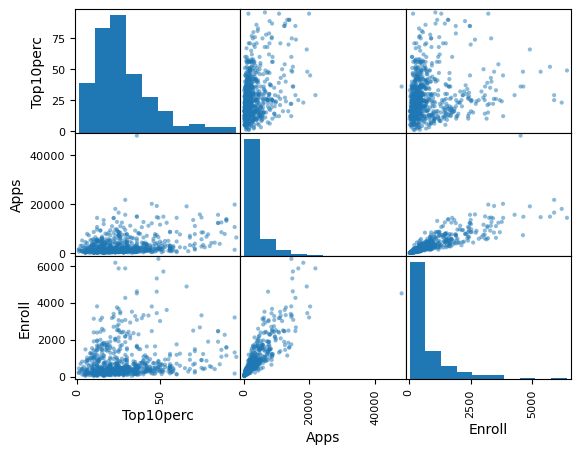

In [159]:
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']])

### Scatterplots are useful in determining relationships/correlations and spotting outliers. Some relationships are intuative but it helps to confirm such as the case of more applications leading to higher enrollment.

<Axes: xlabel='Room.Board', ylabel='Private'>

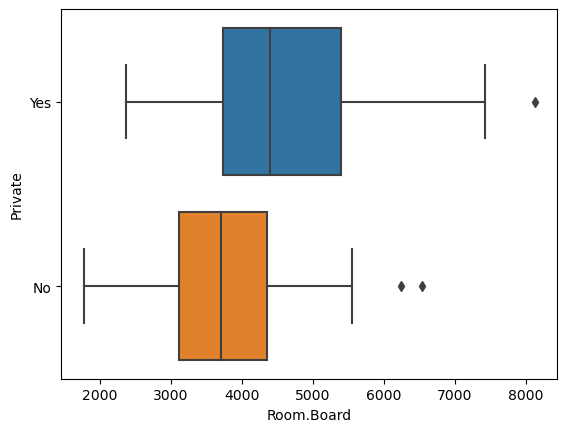

In [160]:
sns.boxplot(x = college['Room.Board'], y = college['Private'])

### Box plots offer good visualization of the spread of data. We can derive insights from boxplots such as private colleges/universities on average being more expansive than public colleges/universities buy comparing the means of the room and boarding costs. We can also tell that private colleges/universities vary a lot more public in room and boarding costs (private colleges/universities are more spread meaning less consistency in costs). Depending on the goal we can extract more information.

### Next we will classify a college/university as elite or not based on the top 10 % feature (percentage of students that were in the top 10 of their respective high schools). If a university contains more than 50% top 10 enrollments then it is classified as elite.

In [161]:
college['Elite'] = np.where(college['Top10perc'] > 50, 'Yes', 'No')
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No


In [162]:
college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

### Based on the set rule, only 78 colleges/universities are considered as elite. The list contains 777 colleges/universities.

<Axes: xlabel='Room.Board', ylabel='Elite'>

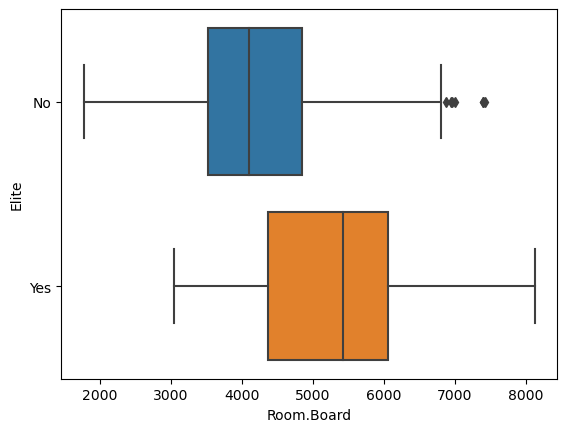

In [163]:
sns.boxplot(x = college['Room.Board'], y = college['Elite'])

### As expected, elite colleges/universities have on average higher room and boarding costs and thus can be assumed that overall attending these colleges/universities will be more expansive when filtering in tuition and other associated costs.

### The next step is to create bins of data and group them in categories to help conceptualize the type of budget needed to attend in these colleges/universities. I will use the pandas cut method for automatic grouping.

In [164]:
college['Room.Board'] = pd.cut(college['Room.Board'], 3, labels= ['Cheap', 'Affrodable', 'Expansive'])
college['Books'] = pd.cut(college['Books'], 5, labels=['Very low', 'Low', 'Medium', 'High', 'Very high'])
college['Personal'] = pd.cut(college['Personal'], 4, labels=['Low', 'Medium', 'High', 'Luxurious'])
college['Grad.Rate'] = pd.cut(college['Grad.Rate'], 5, labels=['Very low', 'Low', 'Medium', 'High', 'Very high'])

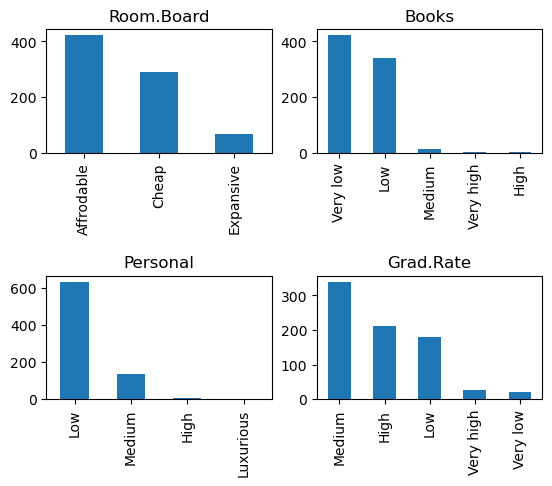

In [165]:
fig = plt.figure()

plt.subplot(221)
college['Room.Board'].value_counts().plot(kind='bar', title = 'Room.Board');
plt.subplot(222)
college['Books'].value_counts().plot(kind='bar', title = 'Books');
plt.subplot(223)
college['Personal'].value_counts().plot(kind='bar', title = 'Personal');
plt.subplot(224)
college['Grad.Rate'].value_counts().plot(kind='bar', title = 'Grad.Rate');

fig.subplots_adjust(hspace=1) # To add space between subplots


### We can see from the above bar graphs that are lot of colleges/universities are classified as affordable and there is a low number of expansive colleges/universities, this can be linked to universities being classfied as elite or not, we observed that only a few colleges/universities are elite. We can also be glad to find that the the majority of these colleges/universities have a medium to high graduation rate with only a few falling under the very low bracket